In [ ]:
#Diana Yuhua, 8-936-481
#Jacky He, 3-740-114
#Dennis Fong, 3-740-2
#Xueya Xie, E-8-172672

In [ ]:
#Descargar las librerias necesarias
!pip install geopandas
!pip install descartes
!pip install geoplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 24.4 MB/s 
     |████████████████████████████████| 16.7 MB 32.5 MB/s 
     |████████████████████████████████| 6.3 MB 42.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.8 MB 15.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 41.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 44.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 50.1 MB/s 
  Installing build depend

In [ ]:
import numpy as np
import geopandas as gpd
import fiona
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Ubicar el dataset de California
file="https://data-cdtfa.opendata.arcgis.com/datasets/CDTFA::cigarette-and-tobacco-licensees.geojson?outSR=%7B%22latestWkid%22%3A3857%2C%22wkid%22%3A102100%7D"
california = gpd.read_file(file)

In [ ]:
#Ubicar el dataset de California
file="https://geohub-cadhcs.hub.arcgis.com/datasets/c31dd1a7ea584dd7ac615f53054502a1_0.geojson?outSR=%7B%22latestWkid%22%3A4326%2C%22wkid%22%3A4326%7D"
california2 = gpd.read_file(file)

In [ ]:
#Ubicar el dataset de Panama
file="https://www.sinia.gob.pa/datos/Cuencas_Hidrograficas_250k_Po.zip"
panama = gpd.read_file(file)

In [ ]:
#Describir las columnas de California
columns_names = california2.columns.values
print(columns_names)

['OBJECTID' 'Provider_Number' 'NPI_Provider_Number' 'Owner_Number'
 'Service_Location_Number' 'Provider_Legal_Name'
 'Enrollment_Status_Effective_Dat' 'Provider_Type_Code'
 'Provider_Type_Code_Desc' 'Provider_License_Number'
 'Provider_Specialty_Code' 'Provider_Specialty_Code_Desc'
 'Out_Of_State_Ind' 'Out_Of_State_Desc' 'Provider_Address_County_Code'
 'Provider_Address_County_Code_De' 'Provider_Address_Attention_Line'
 'Provider_Address_Line_1' 'Provider_Address_Line_2'
 'Provider_Address_City' 'Provider_Address_State' 'Provider_Address_Zip'
 'Provider_Address_Latitude' 'Provider_Address_Longitude' 'MSSA_ID'
 'Tract_ID' 'File_' 'Latest_Update_Date' 'geometry']


In [ ]:
#Describir las columnas de Panama
columns_names = panama.columns.values
print(columns_names)

['Cod_Cuen_H' 'Nom_Cuen_H' 'Nom_Rio_Pr' 'Peri_km' 'Area_km2' 'SHAPE_STAr'
 'SHAPE_STLe' 'geometry']


       OBJECTID      type                           formatedAddress  \
0             1  Retailer        710 N Rose Dr, Placentia, CA 92870   
1             2  Retailer   320 W Colorado Blvd, Pasadena, CA 91105   
2             3  Retailer     1700 Yosemite Blvd, Modesto, CA 95354   
3             4  Retailer    1805 Countryside Dr, Turlock, CA 95380   
4             5  Retailer        3504 W Hobsonway, Blythe, CA 92225   
...         ...       ...                                       ...   
31370     31371  Retailer     3201 Camino del Sol, Oxnard, CA 93030   
31371     31372  Retailer      517 W El Monte Way, Dinuba, CA 93618   
31372     31373  Retailer    3080 E La Palma Ave, Anaheim, CA 92806   
31373     31374  Retailer  3547 W Imperial Hwy, Inglewood, CA 90303   
31374     31375  Retailer  15805 Roscoe Blvd, Los Angeles, CA 91343   

        latitude   longitude                     geometry  
0      33.877512 -117.841789  POINT (-117.84179 33.87751)  
1      34.145444 -118.15716

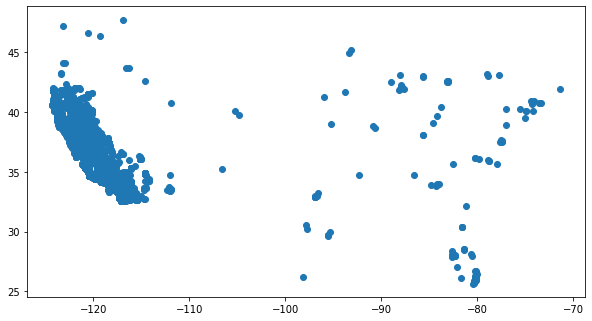

In [ ]:
#Visualiza dataframe de california
california.plot(figsize=(10, 6));
print( california )

    Cod_Cuen_H                                         Nom_Cuen_H  \
0            0                                        Río Terraba   
1            0                               Río Esquinas y otros   
2            0                                   Río Moin y otros   
3            0                                       Río Bananito   
4            0                                    Río La Estrella   
5            0                                         Río Banano   
6          166                                         Río Jurado   
7          117                   Ríos entre el Chagres y Mandinga   
8          128                                       Río La Villa   
9          150            Ríos entre el Bayano y el Santa Bárbara   
10          95       Río Cricamola y entre Cricamola y Calovébora   
11         158                                         Río Tucutí   
12         160                    Ríos entre el Tucutí y el Sambú   
13         102                    

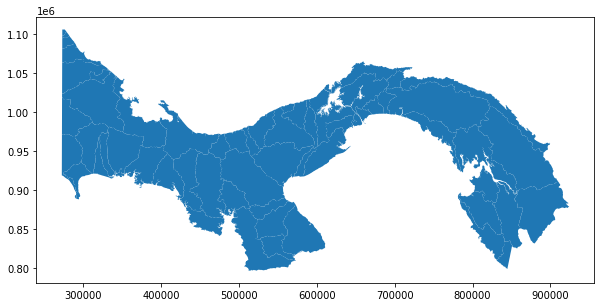

In [ ]:
#Visualiza dataframe de Panama
panama.plot(figsize=(10, 5));
print( panama )

In [ ]:
#Mostrar donde el ObjectID es mayor que 31373
california_nr = california[california.OBJECTID > 31373]
california_nr


,OBJECTID,type,formatedAddress,latitude,longitude,geometry
31373,31374,Retailer,"3547 W Imperial Hwy, Inglewood, CA 90303",33.931282,-118.334448,POINT (-118.33445 33.93128)
31374,31375,Retailer,"15805 Roscoe Blvd, Los Angeles, CA 91343",34.221606,-118.476895,POINT (-118.47689 34.22161)


In [ ]:
#Mostrar solamente las cuencas que tiene perimetro mayor que 500km
panama2 = panama[panama.Peri_km >= 500]
panama2


,Cod_Cuen_H,Nom_Cuen_H,Nom_Rio_Pr,Peri_km,Area_km2,SHAPE_STAr,SHAPE_STLe,geometry
27,121,Ríos entre el Mandinga y Armila,Río Cartí,711.961384,2032.538213,2.032538e+09,7.119614e+05,"POLYGON ((773789.917 1036234.399, 773744.916 1..."
30,152,Río Santa Bárbara y entre Santa Bárbara y Chuc...,Río Sabanas,712.199918,2496.938598,2.496939e+09,7.121999e+05,"POLYGON ((808575.460 981333.548, 808575.460 98..."
34,115,Canal de Panamá,Río Chagres,1348.409127,2831.553651,2.831554e+09,1.348409e+06,"MULTIPOLYGON (((689671.175 1039789.964, 689669..."
57,148,Río Bayano,Río Bayano,585.698566,5199.584247,5.199584e+09,5.856986e+05,"POLYGON ((822255.669 1007523.957, 822255.669 1..."


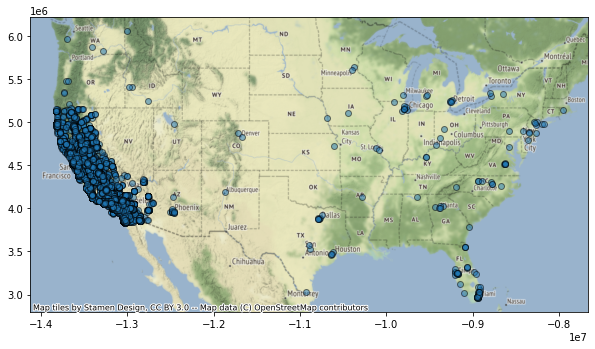

In [ ]:
#Contextualizar mapa de California
import contextily as cx

california_wm = california.to_crs(epsg=3857)
ax = california_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax)